In [130]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [131]:
df = pd.read_csv("Mall_Customers.csv")

In [132]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


Univariate Analysis

In [133]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

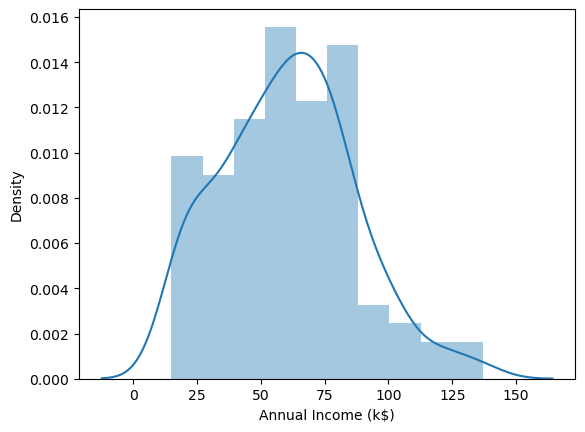

In [134]:
sns.distplot(df['Annual Income (k$)'])

In [135]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

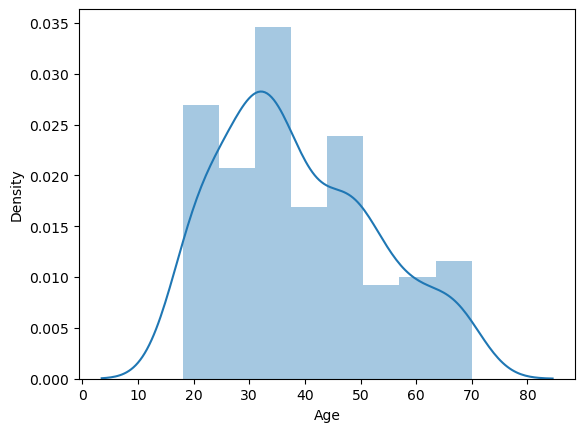

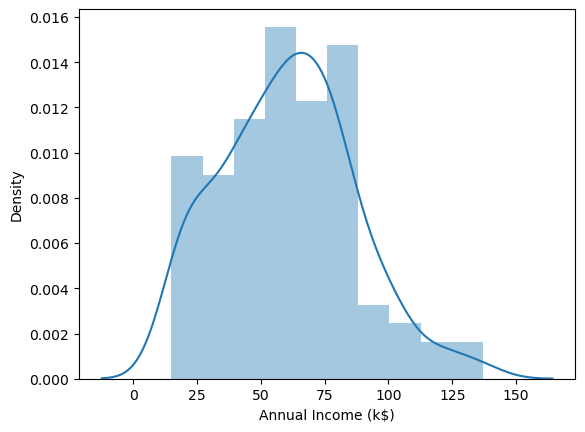

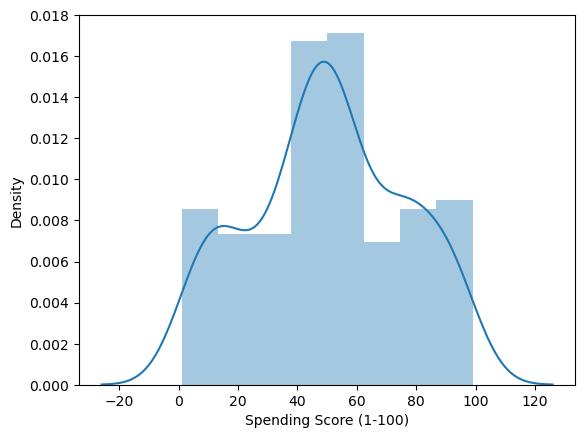

In [136]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i  in columns:
     plt.figure()
     sns.distplot(df[i])

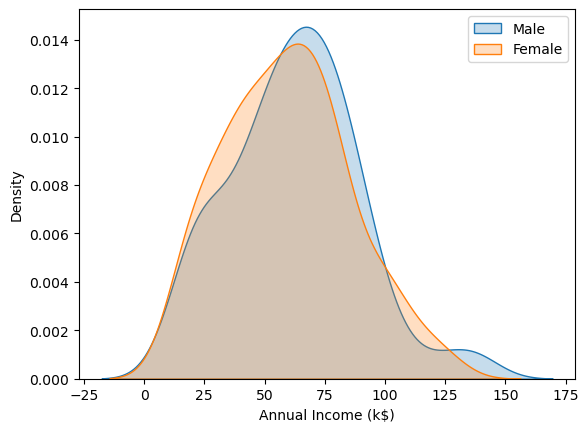

In [137]:
sns.kdeplot(df[df['Gender'] == 'Male']['Annual Income (k$)'], shade=True, label='Male')
sns.kdeplot(df[df['Gender'] == 'Female']['Annual Income (k$)'], shade=True, label='Female')
plt.legend()

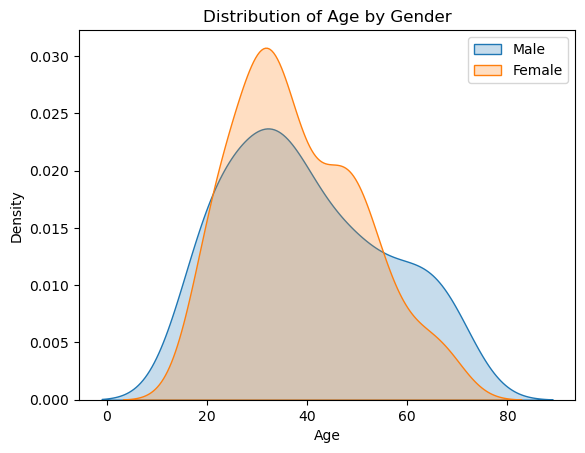

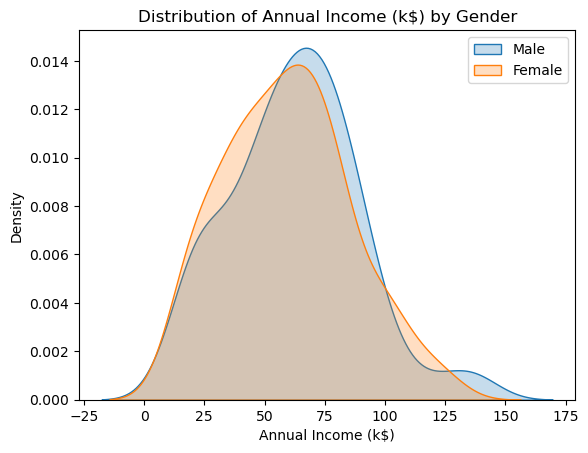

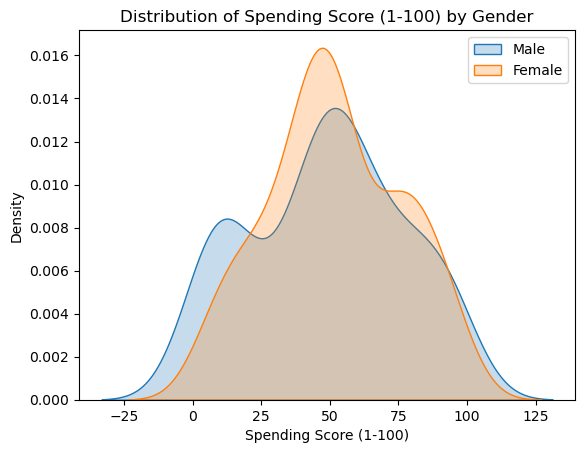

In [138]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(data=df[df['Gender'] == 'Male'][i], shade=True, label='Male')
    sns.kdeplot(data=df[df['Gender'] == 'Female'][i], shade=True, label='Female')
    plt.title(f'Distribution of {i} by Gender')
    plt.legend()
    plt.show()


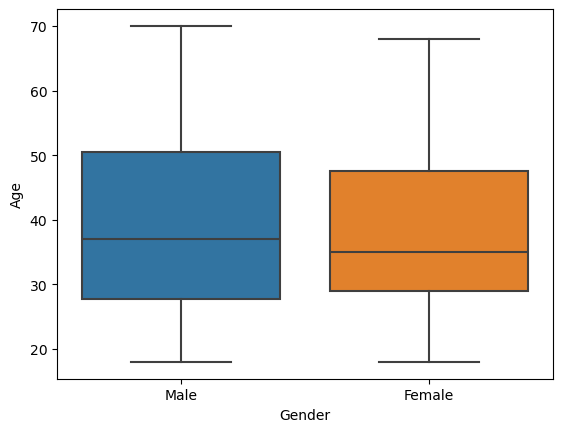

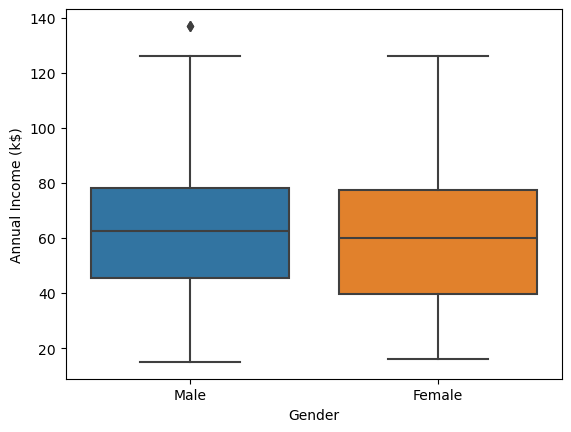

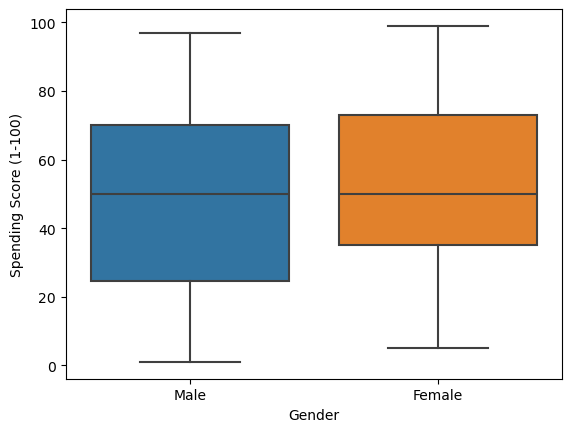

In [139]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i  in columns:
     plt.figure()
     sns.boxplot(data=df,x='Gender',y=df[i])

In [140]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

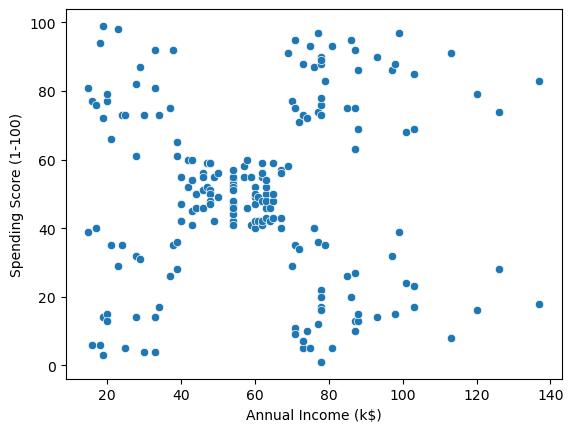

In [71]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

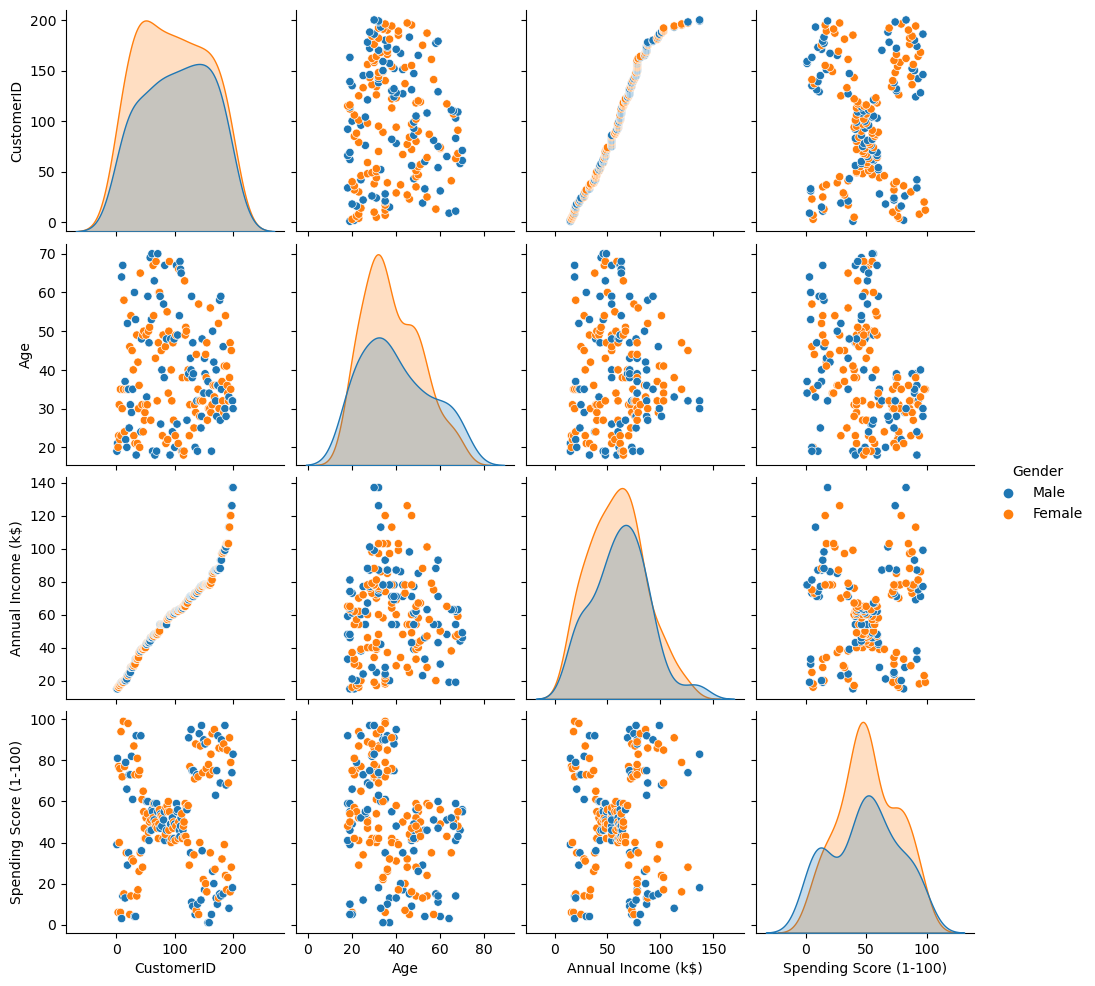

In [141]:
#df =df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [142]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [143]:
# Encode Gender column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Compute correlation matrix (after encoding)
df.corr()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Gender,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


<Axes: >

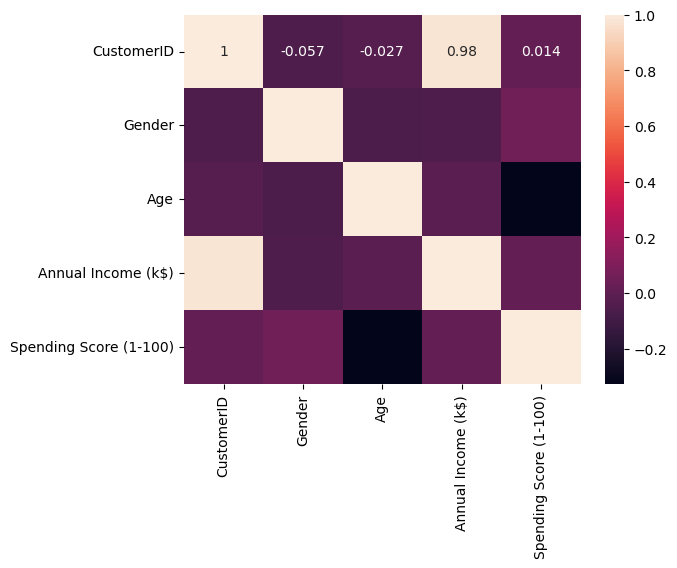

In [144]:
sns.heatmap(df.corr(),annot=True)

In [145]:
clustering1 = KMeans(n_clusters=3)

In [146]:
clustering1.fit(df[['Annual Income (k$)' ]])

KMeans(n_clusters=3)

In [147]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [148]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [149]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
0    74
1    36
Name: count, dtype: int64

In [150]:
clustering1.inertia_

23517.330930930937

In [151]:
inertia_scores = []
for i in range(1,11):
     kmeans=KMeans(n_clusters=i)
     kmeans.fit(df[['Annual Income (k$)' ]])
     inertia_scores.append(kmeans.inertia_)

In [152]:
inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3936.796825396825,
 2822.4996947496948,
 2168.4787157287155,
 1734.167748917749]

<function matplotlib.pyplot.show(close=None, block=None)>

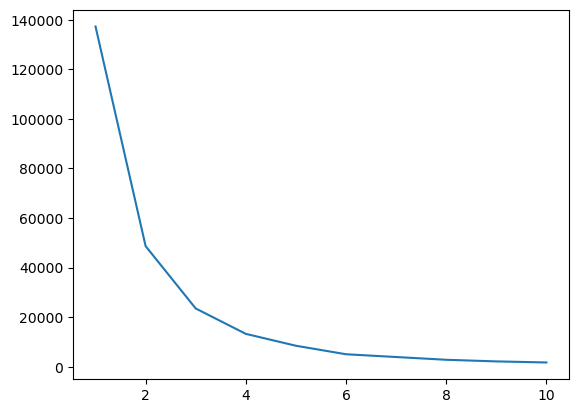

In [153]:
plt.plot(range(1,11),inertia_scores)
plt.show

In [154]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


#Bivariate Clustering 

In [155]:
#Bivariate Clustering 
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,0,19,15,39,0,1
1,2,0,21,15,81,0,2
2,3,1,20,16,6,0,1
3,4,1,23,16,77,0,2
4,5,1,31,17,40,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

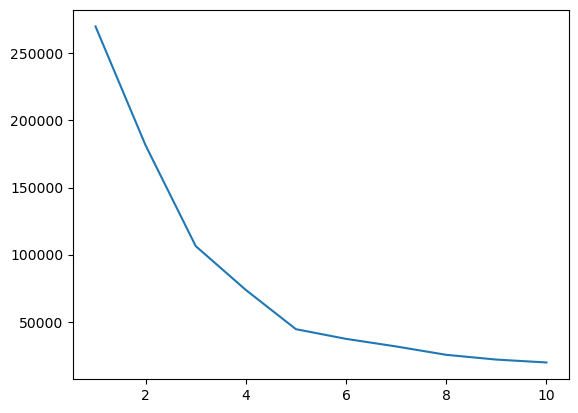

In [156]:
inertia_scores2 = []
for i in range(1,11):
     kmeans2=KMeans(n_clusters=i)
     kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
     inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)
plt.show

In [157]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

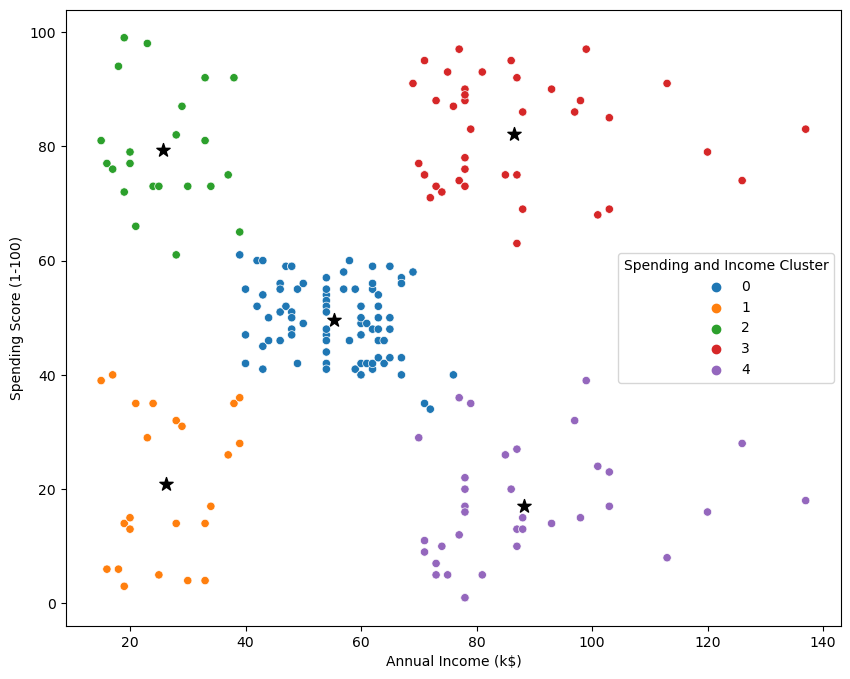

In [183]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig("clustring_bivaraiate")

In [159]:
pd.crosstab(df['Spending and Income Cluster'],df.Gender,normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.407407,0.592593
1,0.391304,0.608696
2,0.409091,0.590909
3,0.461538,0.538462
4,0.542857,0.457143


In [129]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,42.716049,55.296296,49.518519
4,45.217391,26.304348,20.913043


Multivariate Clustering 

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scale =  StandardScaler()

In [172]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,0,19,15,39,0,1
1,2,0,21,15,81,0,2
2,3,1,20,16,6,0,1
3,4,1,23,16,77,0,2
4,5,1,31,17,40,0,1


In [175]:
dff = df[df.columns.difference(['CustomerID', 'Income Cluster', 'Spending and Income Cluster'])]

In [176]:
dff.head()

,Age,Annual Income (k$),Gender,Spending Score (1-100)
0,19,15,0,39
1,21,15,0,81
2,20,16,1,6
3,23,16,1,77
4,31,17,1,40


In [177]:
dff = scale.fit_transform(dff)

<function matplotlib.pyplot.show(close=None, block=None)>

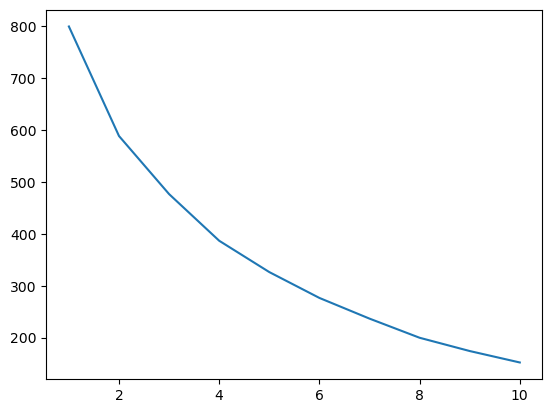

In [180]:
inertia_scores3 = []
for i in range(1,11):
     kmeans3=KMeans(n_clusters=i)
     kmeans3.fit(dff)
     inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)
plt.show

In [181]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,0,19,15,39,0,1
1,2,0,21,15,81,0,2
2,3,1,20,16,6,0,1
3,4,1,23,16,77,0,2
4,5,1,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,3
196,197,1,45,126,28,1,4
197,198,0,32,126,74,1,3
198,199,0,32,137,18,1,4


In [182]:
df.to_csv('clustring.csv')